### 1.先采用泰坦尼克号乘客数据集进行实验

In [17]:
# 这里先下载XGBoost
#!pip install xgboost

In [18]:
'''
实验过程：
1.获取数据
2.数据基本处理
    2.1 确定特征值,⽬标值
    2.2 缺失值处理
    2.3 数据集划分
3.特征⼯程(字典特征抽取)
4.机器学习(xgboost)
5.模型评估
'''

'\n实验过程：\n1.获取数据\n2.数据基本处理\n    2.1 确定特征值,⽬标值\n    2.2 缺失值处理\n    2.3 数据集划分\n3.特征⼯程(字典特征抽取)\n4.机器学习(xgboost)\n5.模型评估\n'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [20]:
# 1.获取数据
titanic = pd.read_csv("./data/Titanic.txt")

# 2.数据基本处理

# 将 Pclass 转为字符串类型（如有必要）
# 数据类型问题：如果 Pclass 列是字符串类型，而你在处理时没有正确转换，可能导致它被视为单一类别。
titanic['Pclass'] = titanic['Pclass'].astype(str)
titanic = titanic.dropna(subset=["Survived"])

#   2.1确定特征值,⽬标值
x = titanic[['Pclass','Age','Sex']]
y = titanic['Survived']

#   2.2缺失值处理

x['Age'].fillna(x['Age'].mean(),inplace=True)

#   2.3数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# 3.特征⼯程(字典特征抽取)
transfer = DictVectorizer(sparse=False)

x_train = transfer.fit_transform(x_train.to_dict(orient="records"))
x_test = transfer.transform(x_test.to_dict(orient="records"))

# 4.机器学习(xgboost)
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

xgb.score(x_test,y_test)


C:\Users\ZSJ\AppData\Local\Temp\ipykernel_16928\2070542047.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Age'].fillna(x['Age'].mean(),inplace=True)
C:\Users\ZSJ\AppData\Local\Temp\ipykernel_16928\2070542047.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'].fillna(x['Age'].mean(),inplace=True)


0.8263157894736842

XGBoost最大深度为0的树的评分为：0.8315789473684211
XGBoost最大深度为1的树的评分为：0.8210526315789474
XGBoost最大深度为2的树的评分为：0.8315789473684211
XGBoost最大深度为3的树的评分为：0.8263157894736842
XGBoost最大深度为4的树的评分为：0.8473684210526315
XGBoost最大深度为5的树的评分为：0.8263157894736842
XGBoost最大深度为6的树的评分为：0.8263157894736842
XGBoost最大深度为7的树的评分为：0.8315789473684211
XGBoost最大深度为8的树的评分为：0.8263157894736842
XGBoost最大深度为9的树的评分为：0.8157894736842105


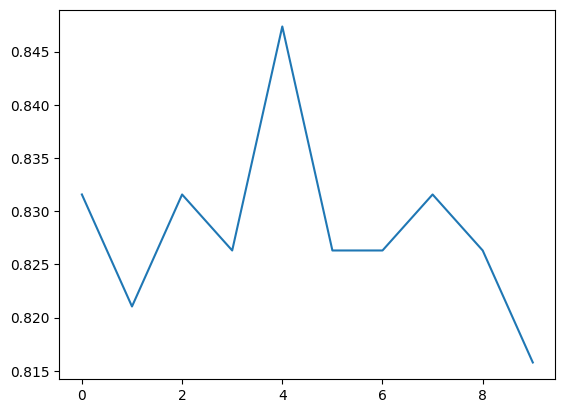

In [22]:
# 针对 max_depth 进行调优
depth_range = range(10)
scores = []
for i in depth_range:
    xg = XGBClassifier(eta = 0.3, gamma=0, max_depth = i)
    xg.fit(x_train,y_train)
    score = xg.score(x_test,y_test)
    print(f"XGBoost最大深度为{i}的树的评分为：{score}")
    scores.append(score)

# 结果可视化
plt.plot(depth_range, scores)
plt.show()